In [1]:
cd /export/research/analysis/human/grosenberg/ugrant_20294/analysis_flair

/export/research/analysis/human/grosenberg/ugrant_20294/analysis_flair


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# n(i) denotes number of mask dilation iterations (n0 => only 'image quality' correction has been applied)
stats0 = pd.read_csv('wmh_stats_n0.txt', sep='\t')
stats1 = pd.read_csv('wmh_stats_n1.txt', sep='\t')
stats2 = pd.read_csv('wmh_stats_n2.txt', sep='\t')
stats3 = pd.read_csv('wmh_stats_n3.txt', sep ='\t')
stats4 = pd.read_csv('wmh_stats_n4.txt', sep = '\t')


In [4]:
stats0.head()

,Subject_Date_ID,WMH_1,WMH_2,Common,Only_1,Only_2,Dice
0,M87104356_20180327,6489,6422,5711,778,711,0.884672
1,M87104356_20180327,6489,6561,5850,639,711,0.896552
2,M87120729_20180406,10647,7987,7252,3395,735,0.778362
3,M87120729_20180406,10647,9483,8748,1899,735,0.869151
4,M87128932_20180306,5840,6176,4699,1141,1477,0.782124


In [5]:
dice0 = stats0[['Dice']].astype(float)   # Passing single column as list creates df instead of series
dice1 = stats1[['Dice']].astype(float)
dice2 = stats2[['Dice']].astype(float)    
dice3 = stats3[['Dice']].astype(float)
dice4 = stats4[['Dice']].astype(float)

dice0.head()

,Dice
0,0.884672
1,0.896552
2,0.778362
3,0.869151
4,0.782124


In [6]:
# In each case first row of pair contains raw dice coeff of segmentation output with no corrections applied
# Keep only corrected values for below analysis
dice0 = dice0[1::2].values
dice1 = dice1[1::2].values
dice2 = dice2[1::2].values
dice3 = dice3[1::2].values
dice4 = dice4[1::2].values

all_dice = np.concatenate([dice0, dice1, dice2, dice3, dice4], axis=1)
dice_df = pd.DataFrame(all_dice, columns=['d0','d1','d2','d3','d4'])

dice_df.head()

,d0,d1,d2,d3,d4
0,0.896552,0.942731,0.946830,0.947753,0.948137
1,0.869151,0.901510,0.903627,0.904154,0.904734
2,0.798621,0.869874,0.881791,0.886810,0.889007
3,0.901920,0.930840,0.934297,0.935752,0.936627
4,0.814067,0.859831,0.867241,0.870458,0.871608


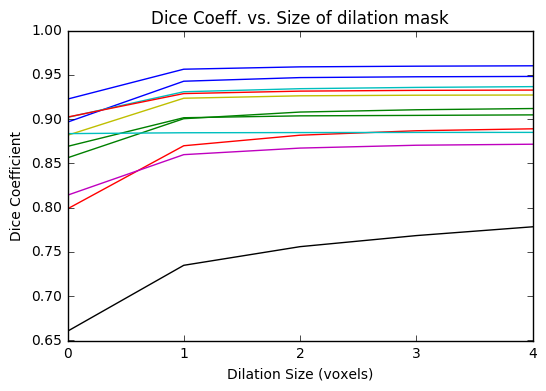

In [7]:
for idx in range(dice_df.shape[0]):
    
    plt.plot(dice_df.loc[idx].values)
    
plt.title('Dice Coeff. vs. Size of dilation mask')
plt.xticks(range(5))
plt.xlabel('Dilation Size (voxels)')
plt.ylabel('Dice Coefficient')

## Kinks in above graphs give optimal voxel dilation size = 1